I was interested in looking at the words that frequently occur in the news. For a future project, it would be interesting to use the NYT API to sort through all of their headlines, but for today I'll be accessing the home pages for several of California's newspapers to see if any themes emerge for today's news. 

In [263]:
#Library 
import bs4 as beutifulsoup
from urllib.request import urlopen
import re as re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from PIL import Image

I decided to look at two NorCal and two SoCal papers (Sacramento Bee, SF Chronicle, LA Times, & San Diego Tribune)

In [264]:
# Set URLs for the four websites
URL1 = 'http://www.sacbee.com/news/'
URL2 = 'http://www.sfchronicle.com/'
URL3 = 'http://www.latimes.com/'
URL4 = 'http://www.sandiegouniontribune.com/'

In [265]:
# Download html from each of the four websites using beautifulsoup
r1 = urlopen(URL1).read()
soup = beutifulsoup.BeautifulSoup(r1, "html5lib")
page1_html = soup.prettify()

r2 = urlopen(URL2).read()
soup = beutifulsoup.BeautifulSoup(r2, "html5lib")
page2_html = soup.prettify()

r3 = urlopen(URL3).read()
soup = beutifulsoup.BeautifulSoup(r3, "html5lib")
page3_html = soup.prettify()

r4 = urlopen(URL4).read()
soup = beutifulsoup.BeautifulSoup(r4, "html5lib")
page4_html = soup.prettify()

# Create set that includes html for all four papers (for California plot below)
Overall = page1_html + page2_html + page3_html + page4_html

In [266]:
#Find list of medium length words (5-8 characters) on each newspaper's home page. Shorter and longer words tended to be less relevant

pattern = ' \w{5,8} '

SacList = re.findall(pattern, page1_html)
Sac = ''.join(SacList)

SFList = re.findall(pattern, page2_html)
SF = ''.join(SFList)

LAList = re.findall(pattern, page3_html)
LA = ''.join(LAList)

SDList = re.findall(pattern, page4_html)
SD = ''.join(SDList)

# Create list that includes all four papers
CalList = SacList + SFList + LAList + SDList
Cal = ''.join(CalList)

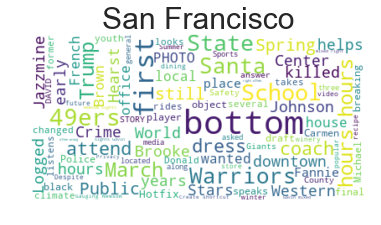

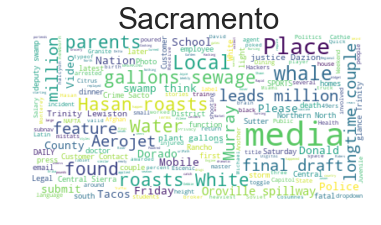

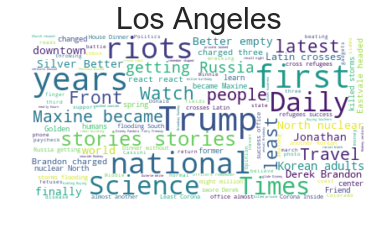

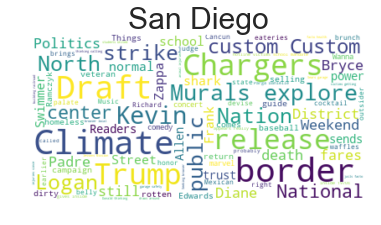

In [267]:
# Generate a word cloud image for each of the four cities using wordcloud generator

# Set of common words to exclude (from word cloud package), plus adding some news site words to make the word cloud better
stopwords = set(STOPWORDS)
stopwords.add("screen")
stopwords.add("solid")
stopwords.add("trb_brk")
stopwords.add("adaptive")
stopwords.add("Diego")
stopwords.add("Angeles")
stopwords.add("Oakland")
stopwords.add("April")


# Word cloud for SF and make it look niceish
wordcloud = WordCloud(background_color="white", max_font_size=40, stopwords = stopwords).generate(SF)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('San Francisco', fontsize=30)
plt.show()

# Word cloud for Sac and make it look niceish
wordcloud = WordCloud(background_color="white", max_font_size=40, stopwords = stopwords).generate(Sac)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Sacramento', fontsize=30)
plt.show()

# Word cloud for LA and make it look niceish
wordcloud = WordCloud(background_color="white", max_font_size=40, stopwords = stopwords).generate(LA)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Los Angeles', fontsize=30)
plt.show()

# Word cloud for SD and make it look niceish
wordcloud = WordCloud(background_color="white", max_font_size=40, stopwords = stopwords).generate(SD)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('San Diego', fontsize=30)
plt.show()


At the time of submitting the assignment, some interesting news items float to the top. Not unexpectedly, Trump looms large in each of the word clouds, as well as associated terms (e.g., nuclear). There are also some differences across the regions. Regional sports teams pop up in SF & SD (49ers, Warriors, Padres, Chargers). Sacramento is highlighting comedian Hasan Minaj's roasting of Trump. San Diego, being closest to the border, has that term as on of the top hits (also maybe a swimmer was attacked by a shark there?). LA is  remembering the 1992 riots this weekend, so that term is in their cloud. For fun, I'll make a super special word cloud in the shape of the California Golden Bear fromt he state flag. Not sure how to make this a little less blurry though...

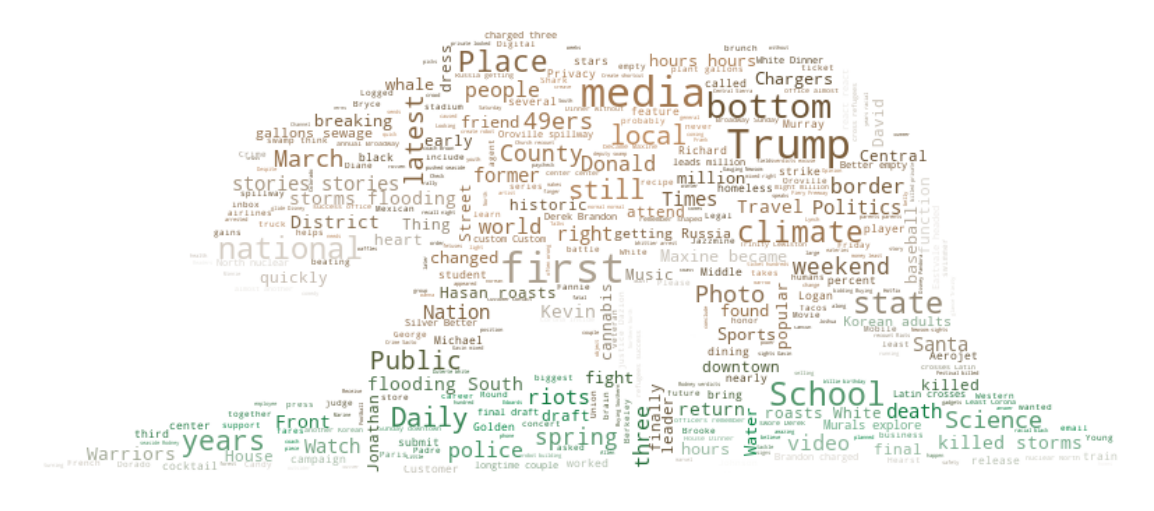

In [268]:
from urllib.request import urlretrieve

# pull JPG image from github and store as pic.jpg in memory
url = 'https://raw.githubusercontent.com/antovich/PyPSC290/master/CalBear.jpg'
urlretrieve(url, 'pic.jpg')

# set coloring mask based on the image (white in image will be used to set cloud boundaries)
calbear_coloring = np.array(Image.open('pic.jpg'))

# create word cloud using coloring mask
wordcloud = WordCloud( background_color="white",max_words=2000, mask=calbear_coloring,
               stopwords=stopwords, max_font_size=30, random_state=42).generate(Cal)

# recolor image to match colors generated by mask
image_colors = ImageColorGenerator(calbear_coloring)

# size and show plot
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show();


This shows some interesting news terms that the state is concerned with: Trump, Climate, Cannabis, Water, Nuclear, Baseball, Police, etc.

Since Trump was the largest term across these newsites (not surprising with the 100 day mark falling this weekend, we could look to see what words surround his name:

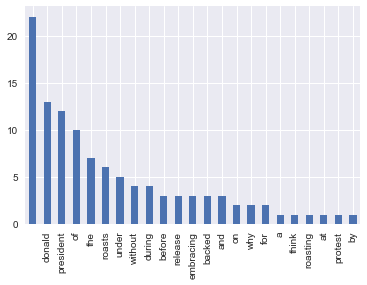

In [269]:
# Look for words that occur before Trump, store those words as type trump_before
pattern = re.compile(r'(?P<trump_before>\w*) trump', re.IGNORECASE)
match_iterator = pattern.finditer(Overall)
matches = [ str(match.groupdict()['trump_before']).lower() for match in match_iterator ]

# Plot frequency count of matches
pd.Series( matches ).value_counts().plot(kind='bar')

Apparently the news is interested in how Trump is viewed, and has identified two camps: We might be roasting or protesting him, or we might be backing or embracing him. 

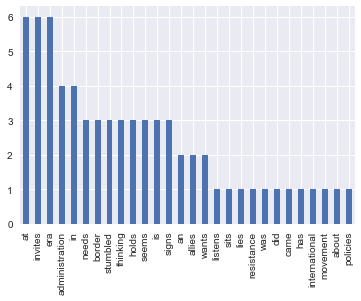

In [270]:
# Look for words that occur after Trump, store those words as type trump_after
pattern = re.compile(r'trump (?P<trump_after>\w*)', re.IGNORECASE)
match_iterator = pattern.finditer(Overall)
matches = [ str(match.groupdict()['trump_after']).lower() for match in match_iterator ]

# Plot frequency count of matches
pd.Series( matches ).value_counts().plot(kind='bar')

The news is also interested in what Trump has done (keywords: signs, policies, border, policies), and the state/country's interpretation (keywords: stumbled, resistance, movement, lies)  